In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:


import xarray as xr              
import numpy as np
import scipy
import pickle
from scipy import stats
import pandas as p
import statistics as stat
import matplotlib.pyplot as plt



In [3]:
dataP = xr.open_dataset("/content/gdrive/My Drive/ML Engineering intern/precipitation.nc")
dataP

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 31)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-31T12:00:00
Data variables:
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-11-25 06:45:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [4]:
dataS = xr.open_dataset("/content/gdrive/My Drive/ML Engineering intern/soil.nc")
dataS

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 31)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-31T12:00:00
Data variables:
    swvl1      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-11-25 06:46:37 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [5]:
dataT = xr.open_dataset("/content/gdrive/My Drive/ML Engineering intern/temperature.nc")
dataT

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 31)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-31T12:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
    swvl1      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-11-24 09:11:25 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

#Temp Data

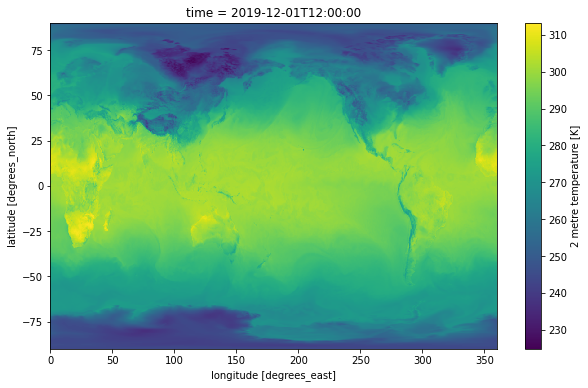

In [6]:
#representation of 2m Temperature
st = dataT.t2m
%matplotlib inline
st[0].plot(figsize=(10, 6))

In [7]:


print('mean_temp =',np.mean(st))
print('median_temp =',np.median(st))
print('var_temp =',np.var(st))
print('stdev_temp =',np.std(st))
print('max_temp =',np.max(st))
print('min_temp=',np.min(st))
print('range_temp =',np.max(st)- np.min(st))



mean_temp = <xarray.DataArray 't2m' ()>
array(278.22284, dtype=float32)
median_temp = 281.04364
var_temp = <xarray.DataArray 't2m' ()>
array(475.48529053)
stdev_temp = <xarray.DataArray 't2m' ()>
array(21.80562592)
max_temp = <xarray.DataArray 't2m' ()>
array(317.29299927)
min_temp= <xarray.DataArray 't2m' ()>
array(219.36126709)
range_temp = <xarray.DataArray 't2m' ()>
array(97.93173218)


#Precipitation Data

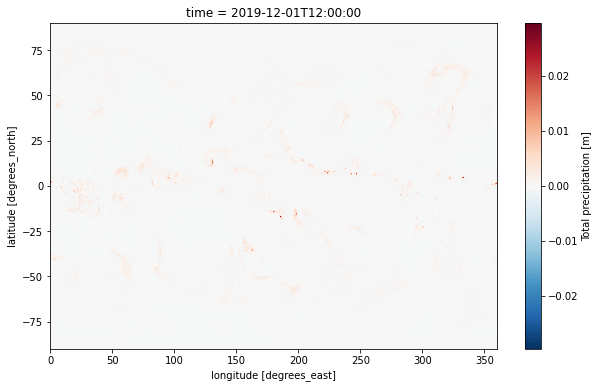

In [9]:
sp = dataP.tp
%matplotlib inline
sp[0].plot(figsize=(10, 6))

In [10]:
print('mean_preci =',np.mean(sp))
print('median_preci =',np.median(sp))
print('var_preci =',np.var(sp))
print('stdev_preci =',np.std(sp))
print('max_preci =',np.max(sp))
print('min_preci =',np.min(sp))
print('range_preci =',np.max(sp)- np.min(sp))

mean_preci = <xarray.DataArray 'tp' ()>
array(0.00010121, dtype=float32)
median_preci = 4.84474e-06
var_preci = <xarray.DataArray 'tp' ()>
array(1.86403639e-07)
stdev_preci = <xarray.DataArray 'tp' ()>
array(0.00043174)
max_preci = <xarray.DataArray 'tp' ()>
array(0.03969765)
min_preci = <xarray.DataArray 'tp' ()>
array(-1.86264515e-09)
range_preci = <xarray.DataArray 'tp' ()>
array(0.03969765)


In [11]:
sp = sp.fillna(0)

#Soil Data

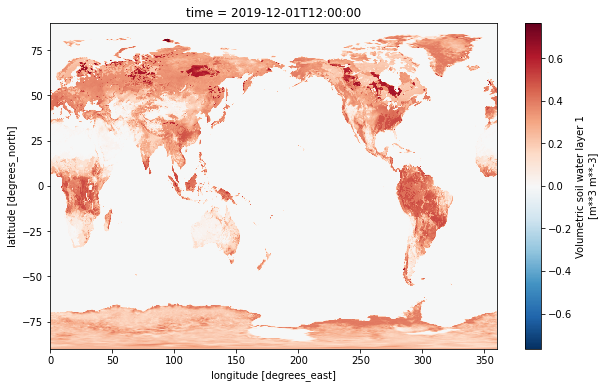

In [12]:
sv = dataS.swvl1
%matplotlib inline
sv[0].plot(figsize=(10, 6))

In [13]:
print('mean_vol =',np.mean(sv))
print('median_vol =',np.median(sv))
print('var_vol =',np.var(sv))
print('stdev_vol =',np.std(sv))
print('max_vol =',np.max(sv))
print('min_vol =',np.min(sv))
print('range_vol =',np.max(sv)- np.min(sv))

mean_vol = <xarray.DataArray 'swvl1' ()>
array(0.08648126, dtype=float32)
median_vol = 1.1384487e-05
var_vol = <xarray.DataArray 'swvl1' ()>
array(0.01563957)
stdev_vol = <xarray.DataArray 'swvl1' ()>
array(0.12505825)
max_vol = <xarray.DataArray 'swvl1' ()>
array(0.76868504)
min_vol = <xarray.DataArray 'swvl1' ()>
array(-0.01776177)
range_vol = <xarray.DataArray 'swvl1' ()>
array(0.78644681)


In [14]:


sv = sv.fillna(0)

In [15]:
dataP

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 31)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-31T12:00:00
Data variables:
    tp         (time, latitude, longitude) float32 3.028661e-06 ... -1.8626451e-09
Attributes:
    Conventions:  CF-1.6
    history:      2020-11-25 06:45:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

(array([3.2118501e+07, 5.3783000e+04, 8.5620000e+03, 2.8760000e+03,
        1.0730000e+03, 4.5200000e+02, 1.3600000e+02, 3.7000000e+01,
        1.8000000e+01, 2.0000000e+00]),
 array([-1.8626451e-09,  3.9697629e-03,  7.9395277e-03,  1.1909293e-02,
         1.5879057e-02,  1.9848824e-02,  2.3818588e-02,  2.7788352e-02,
         3.1758118e-02,  3.5727881e-02,  3.9697647e-02], dtype=float32),
 <a list of 10 Patch objects>)

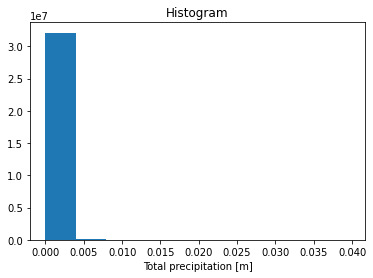

In [16]:


dataP.tp.plot.hist()

In [17]:
sp_new = np.log(dataP.tp) # skewness is fixed by using log transformation
sp_new

/usr/local/lib/python3.6/dist-packages/xarray/core/computation.py:604: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


<xarray.DataArray 'tp' (time: 31, latitude: 721, longitude: 1440)>
array([[[-12.70739 , -12.70739 , -12.70739 , ..., -12.70739 ,
         -12.70739 , -12.70739 ],
        [-12.525171, -12.525171, -12.525171, ..., -12.525171,
         -12.525171, -12.525171],
        [-12.70739 , -12.70739 , -12.70739 , ..., -12.70739 ,
         -12.70739 , -12.70739 ],
        ...,
        [-11.918988, -11.918988, -11.918988, ..., -11.918988,
         -11.918988, -11.918988],
        [-11.608778, -11.608778, -11.608778, ..., -11.608778,
         -11.608778, -11.608778],
        [-11.181414, -11.181414, -11.181414, ..., -11.181414,
         -11.181414, -11.181414]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-11.483686, -11.483686, -11.483686, ..., -11.483686,
         -11.483686, -11.483686],
        [-11.677946, -11.677946, -11.677946, ..., -11.677946,
         -11.677946, -11.677946],
        [-11.677946, -11.677946, -11.677946, ..., -11.677946,
         -11.677946, -11.677946]],

       [[-11.097952, -11.097952, -11.097952, ..., -11.097952,
         -11.097952, -11.097952],
        [-10.761479, -10.761479, -10.761479, ..., -10.761479,
         -10.761479, -10.761479],
        [-10.820283, -10.820283, -10.820283, ..., -10.820283,
         -10.820283, -10.820283],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       ...,

       [[-11.097952, -11.097952, -11.097952, ..., -11.097952,
         -11.097952, -11.097952],
        [-11.372356, -11.372356, -11.372356, ..., -11.372356,
         -11.372356, -11.372356],
        [-11.483686, -11.483686, -11.483686, ..., -11.483686,
         -11.483686, -11.483686],
        ...,
        [-13.624296, -13.624296, -13.624296, ..., -13.624296,
         -13.624296, -13.624296],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[-11.138748, -11.138748, -11.138748, ..., -11.138748,
         -11.138748, -11.138748],
        [-11.372356, -11.372356, -11.372356, ..., -11.372356,
         -11.372356, -11.372356],
        [-11.372356, -11.372356, -11.372356, ..., -11.372356,
         -11.372356, -11.372356],
        ...,
        [-11.752021, -11.752021, -11.752021, ..., -11.832024,
         -11.752021, -11.752021],
        [-12.371094, -12.371094, -12.371094, ..., -12.371094,
         -12.371094, -12.371094],
        [-12.931149, -12.931149, -12.931149, ..., -12.931149,
         -12.931149, -12.931149]],

       [[-10.273745, -10.273745, -10.273745, ..., -10.273745,
         -10.273745, -10.273745],
        [-10.040136, -10.040136, -10.040136, ..., -10.040136,
         -10.040136, -10.040136],
        [-10.097302, -10.097302, -10.097302, ..., -10.097302,
         -10.097302, -10.097302],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-31T12:00:00

(array([3.090797e+06, 2.798134e+06, 3.596721e+06, 4.414197e+06,
        3.661504e+06, 2.139404e+06, 1.095207e+06, 3.966240e+05,
        5.222200e+04, 3.424000e+03]),
 array([-14.317443 , -13.208345 , -12.099247 , -10.990149 ,  -9.881051 ,
         -8.771954 ,  -7.662855 ,  -6.553757 ,  -5.444659 ,  -4.3355613,
         -3.2264633], dtype=float32),
 <a list of 10 Patch objects>)

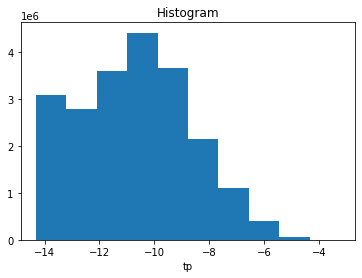

In [18]:
sp_new.plot.hist()

(array([3.3484820e+06, 4.5494630e+06, 5.4647890e+06, 4.6622040e+06,
        2.2647140e+06, 8.5605900e+05, 9.9531000e+04, 2.9920000e+03,
        0.0000000e+00, 1.0937206e+07]),
 array([-14.317443 , -12.885698 , -11.453955 , -10.02221  ,  -8.590466 ,
         -7.1587214,  -5.7269773,  -4.295233 ,  -2.8634887,  -1.4317443,
          0.       ], dtype=float32),
 <a list of 10 Patch objects>)

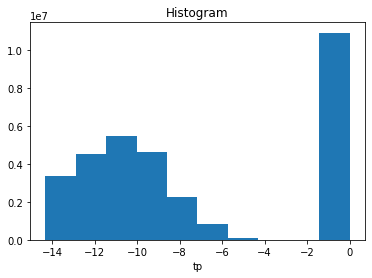

In [19]:
sp_new1 = sp_new.fillna(0)  #changing the nan values to 0 of the unskewed data
sp_new1.plot.hist()

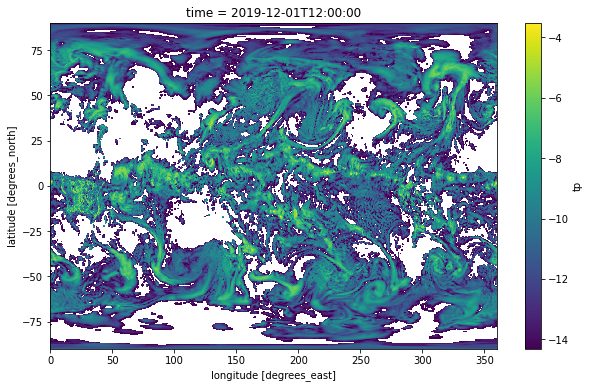

In [20]:


sp_new[0].plot(figsize=(10, 6)) 

In [21]:
x = xr.merge([st,sv])  # creating data array of temerature and volumetric soil water data
y = xr.merge([sp_new1])

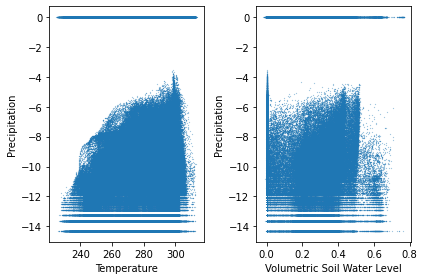

In [22]:
#checking dependency of temperature and volumetric soil water level on precipitation
plt.subplot(1,2,1) 
plt.scatter(x.t2m[0],y.tp[0],s=0.1,marker='.')
plt.xlabel('Temperature')
plt.ylabel('Precipitation')
plt.subplot(1,2,2)
plt.scatter(x.swvl1[0],y.tp[0],s=0.1,marker='.')
plt.xlabel('Volumetric Soil Water Level')
plt.ylabel('Precipitation')
plt.tight_layout()

In [23]:

!pip install torchviz
import numpy as np
import torch
from torchviz import make_dot
from torch.utils.data import Dataset, TensorDataset, DataLoader
from torch.utils.data.dataset import random_split

device = 'cuda' if torch.cuda.is_available() else 'cpu'

x_tensor = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
y_tensor = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
x_tensor_val = [28,29,30]
y_tensor_val = [28,29,30]

class CustomDataset(Dataset):
    def __init__(self, x_tensor, y_tensor):
        self.x = x_tensor
        self.y = y_tensor

    def __getitem__(self, index):
        return (self.x[index], self.y[index])

    def __len__(self):
        return len(self.x)

dataset = CustomDataset(x_tensor, y_tensor) # dataset for training tensors
dataset_val = CustomDataset(x_tensor_val, y_tensor_val) # dataset for validation tensors



     |████████████████████████████████| 51kB 6.8MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3520 sha256=929be78b793fd604a656bfc8dc60e1c38afafc76b926ee3aa4989f7b4ccabb52
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


In [ ]:
from torch import nn, optim
import torch.nn.functional as F
train_dataset, val_dataset = dataset, dataset_val
train_loader = DataLoader(dataset=train_dataset, batch_size=128)
val_loader = DataLoader(dataset=val_dataset, batch_size=128)

class ManualLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(2, 128)
        self.linear2 = nn.Linear(128,64)
        self.output = nn.Linear(64,1)
  
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.output(x)
        return x

def make_train_step(model, loss_fn, optimizer):
    def train_step(x, y):
        model.train()
        yhat = model(x)
        loss = loss_fn(y, yhat)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        return loss.item()
    return train_step

model = ManualLinearRegression().to(device) 
loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=0.01)
train_step = make_train_step(model, loss_fn, optimizer)

n_epochs = 10
training_losses = []
validation_losses = []
print(model.state_dict())

for epoch in range(n_epochs):
    batch_losses = []
    for x_batch, y_batch in train_loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        loss = train_step(x_batch, y_batch)
        batch_losses.append(loss)
    training_loss = np.mean(batch_losses)
    training_losses.append(training_loss)

    with torch.no_grad():
        val_losses = []
        for x_val, y_val in val_loader:
            x_val = x_val.to(device)
            y_val = y_val.to(device)
            model.eval()
            yhat = model(x_val)
            val_loss = loss_fn(y_val, yhat).item()
            val_losses.append(val_loss)
        validation_loss = np.mean(val_losses)
        validation_losses.append(validation_loss)

    print(f"[{epoch+1}] Training loss: {training_loss:.3f}\t Validation loss: {validation_loss:.3f}")

print(model.state_dict())

OrderedDict([('linear1.weight', tensor([[ 0.4112, -0.4060],
        [ 0.4375, -0.3112],
        [ 0.0747,  0.5707],
        [-0.0183,  0.2006],
        [ 0.5053, -0.6478],
        [-0.1377,  0.5174],
        [ 0.5424,  0.5625],
        [ 0.2032, -0.2484],
        [ 0.0701,  0.0908],
        [ 0.5868,  0.6281],
        [-0.1735,  0.4322],
        [-0.5171, -0.3727],
        [-0.0018,  0.5455],
        [-0.0058, -0.0350],
        [-0.2579,  0.6071],
        [-0.3309,  0.6825],
        [ 0.3498,  0.5820],
        [ 0.5376,  0.0500],
        [-0.4560,  0.4607],
        [-0.2846, -0.3128],
        [-0.0695, -0.3379],
        [ 0.5113,  0.0485],
        [-0.4574, -0.6402],
        [-0.3374,  0.2081],
        [ 0.2375, -0.5528],
        [-0.6754, -0.2469],
        [ 0.5165, -0.0854],
        [-0.5157, -0.2164],
        [ 0.1037,  0.0665],
        [ 0.0662,  0.2710],
        [ 0.6605, -0.0627],
        [ 0.5413, -0.5707],
        [-0.0479, -0.4334],
        [ 0.3218,  0.2986],
        [-0.5682

RuntimeError: ignored